In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\deept\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_excel('Solar Generation.xlsx', 
                 parse_dates = ['Date'], index_col = 'Date')

In [3]:
df.head()

,Solar Generation(MU)
Date,
2017-01-01,26.0
2017-01-02,28.0
2017-01-03,25.0
2017-01-04,29.0
2017-01-05,19.0


In [4]:
df.tail()

,Solar Generation(MU)
Date,
2022-03-23,227.0
2022-03-24,237.0
2022-03-25,233.0
2022-03-26,237.0
2022-03-27,248.0


In [5]:
# Checking shape of our data
df.shape
print("Our data contains", df.shape[0],"Rows and", df.shape[1], "Columns")

Our data contains 1912 Rows and 1 Columns


In [6]:
# Getting information of the columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1912 entries, 2017-01-01 to 2022-03-27
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Solar Generation(MU)  1912 non-null   float64
dtypes: float64(1)
memory usage: 29.9 KB


In [7]:
# Datatypes of features
df.dtypes.value_counts()

float64    1
dtype: int64

In [8]:
# Checking for null values
df.isnull().values.any()

False

In [9]:
df.describe()

,Solar Generation(MU)
count,1912.000000
mean,117.744885
std,55.192891
min,19.000000
25%,77.000000
50%,116.530000
75%,157.250000
max,266.000000


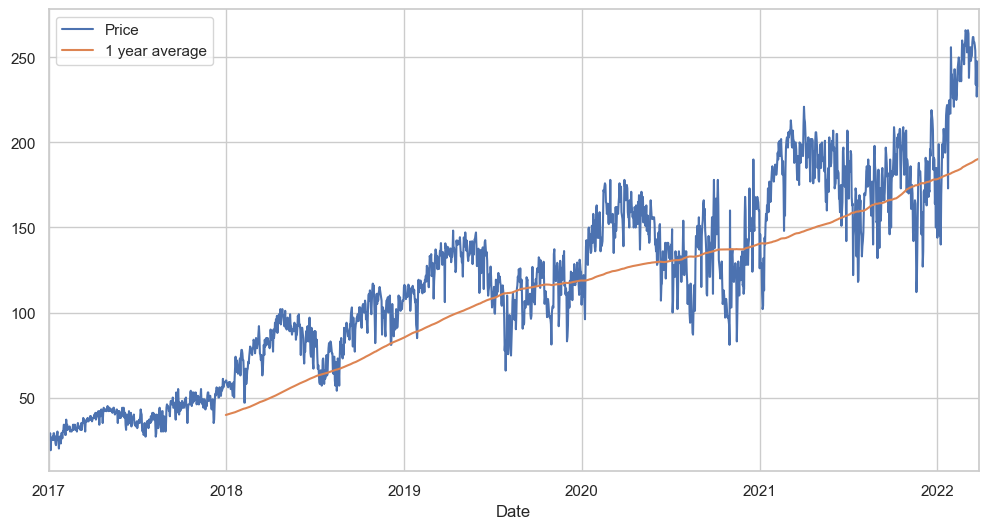

In [10]:
sns.set()
sns.set_style('whitegrid')
df['Solar Generation(MU)'].plot(figsize=(12,6),label='Price')
df['Solar Generation(MU)'].rolling(window=365).mean().plot(label='1 year average')# Plotting the 
#rolling 30 day average against the Close Price
plt.legend()

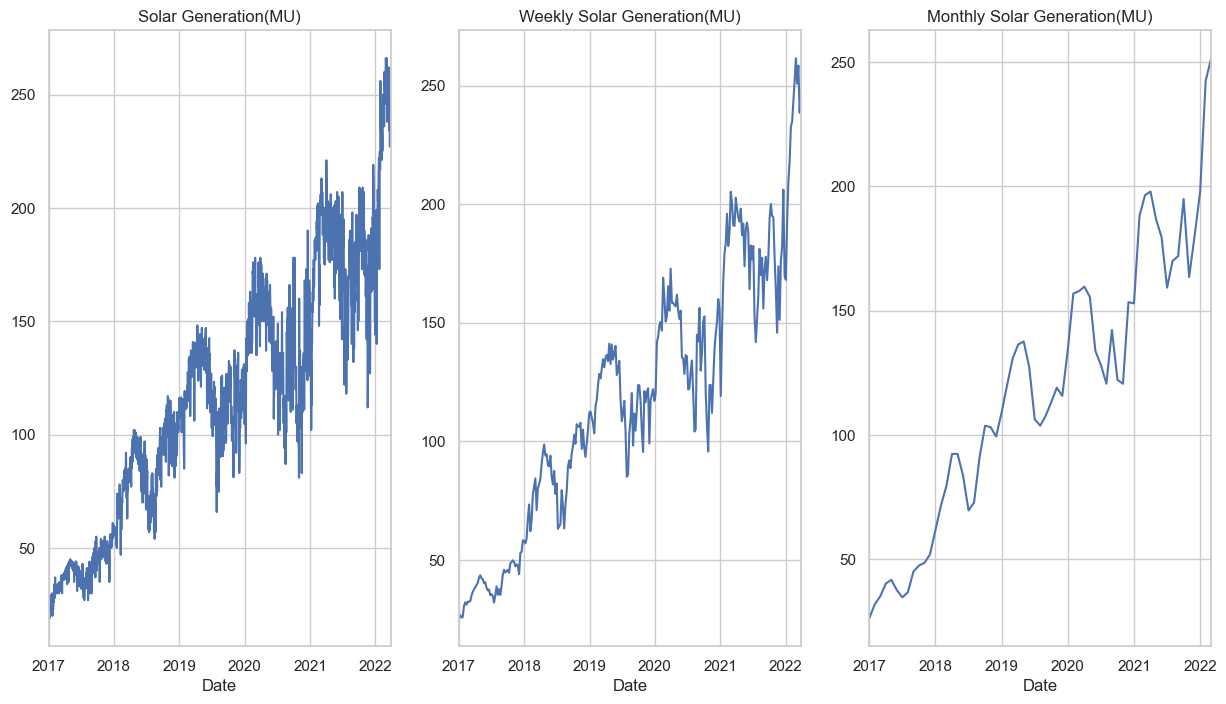

In [11]:
# Plotting data on daily ,weekly and monthly basis
for i, col in enumerate(df.columns):
    fig,ax = plt.subplots(1,3, figsize=(15,8))
    ax[0].set_title(col)
    ax[1].set_title("Weekly " + col)
    ax[2].set_title("Monthly " + col)
    df[col].plot(ax = ax[0])
    df[col].resample('7D').mean().plot(ax = ax[1])
    df[col].resample('M').mean().plot(ax = ax[2])
    plt.show()

In [12]:
# Creating a column which will store the price of bitcoin after two days 
df['Solar Generation(MU) after 365 days'] = df['Solar Generation(MU)'].shift(-365)

In [13]:
X = pd.DataFrame(df['Solar Generation(MU)'])
y =  pd.DataFrame(df['Solar Generation(MU) after 365 days'])

In [14]:
1912-365

1547

In [15]:
X = np.array(X.iloc[1:1547,:])
y = np.array(y.iloc[1:1547,:])

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

print(f"Mean Absolute Error            : {round(mean_absolute_error(y_pred,y_test),2)}")
print(f"Mean Squared Error             : {round(mean_squared_error(y_pred,y_test),2)}")
print(f"Root Mean Squared Error        : {round(sqrt(mean_squared_error(y_pred,y_test)),2)}")
print(f"Mean Absolute Percentage Error : {round(mean_absolute_percentage_error(y_pred,y_test),2)}")

C:\Users\deept\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Absolute Error            : 15.68
Mean Squared Error             : 443.21
Root Mean Squared Error        : 21.05
Mean Absolute Percentage Error : 0.12


In [19]:
forecast = rf.predict(np.array(df['Solar Generation(MU)'].tail(365)).reshape(-1,1))

C:\Users\deept\AppData\Local\Temp\ipykernel_26416\1997678380.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df1)


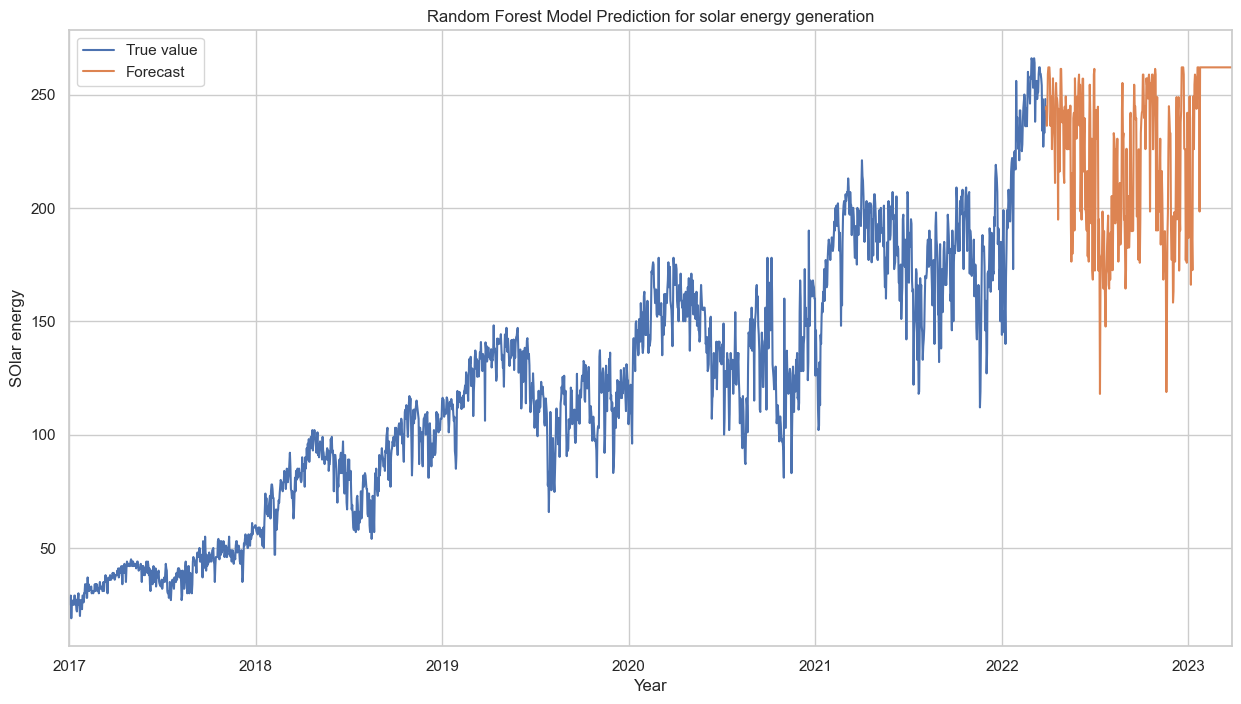

In [20]:
from datetime import datetime, timedelta
last_date = df.iloc[-1].name
modified_date = last_date + timedelta(days=1)
date=pd.date_range(modified_date,periods=365,freq='D')
df1=pd.DataFrame(forecast,columns=['Forecast'],index=date)
df = df.append(df1)
df['Solar Generation(MU)'].plot(figsize=(15,8), label = 'True value')
df['Forecast'].plot(label='Forecast')
plt.xlabel('Year')
plt.ylabel('SOlar energy')
plt.title('Random Forest Model Prediction for solar energy generation')
plt.legend()

In [21]:
feature_names = np.array([df.columns[0],df.columns[1]])

In [22]:
from sklearn import tree

InvalidParameterError: The 'feature_names' parameter of plot_tree must be an instance of 'list' or None. Got array(['Solar Generation(MU)', 'Solar Generation(MU) after 365 days'],
      dtype='<U35') instead.

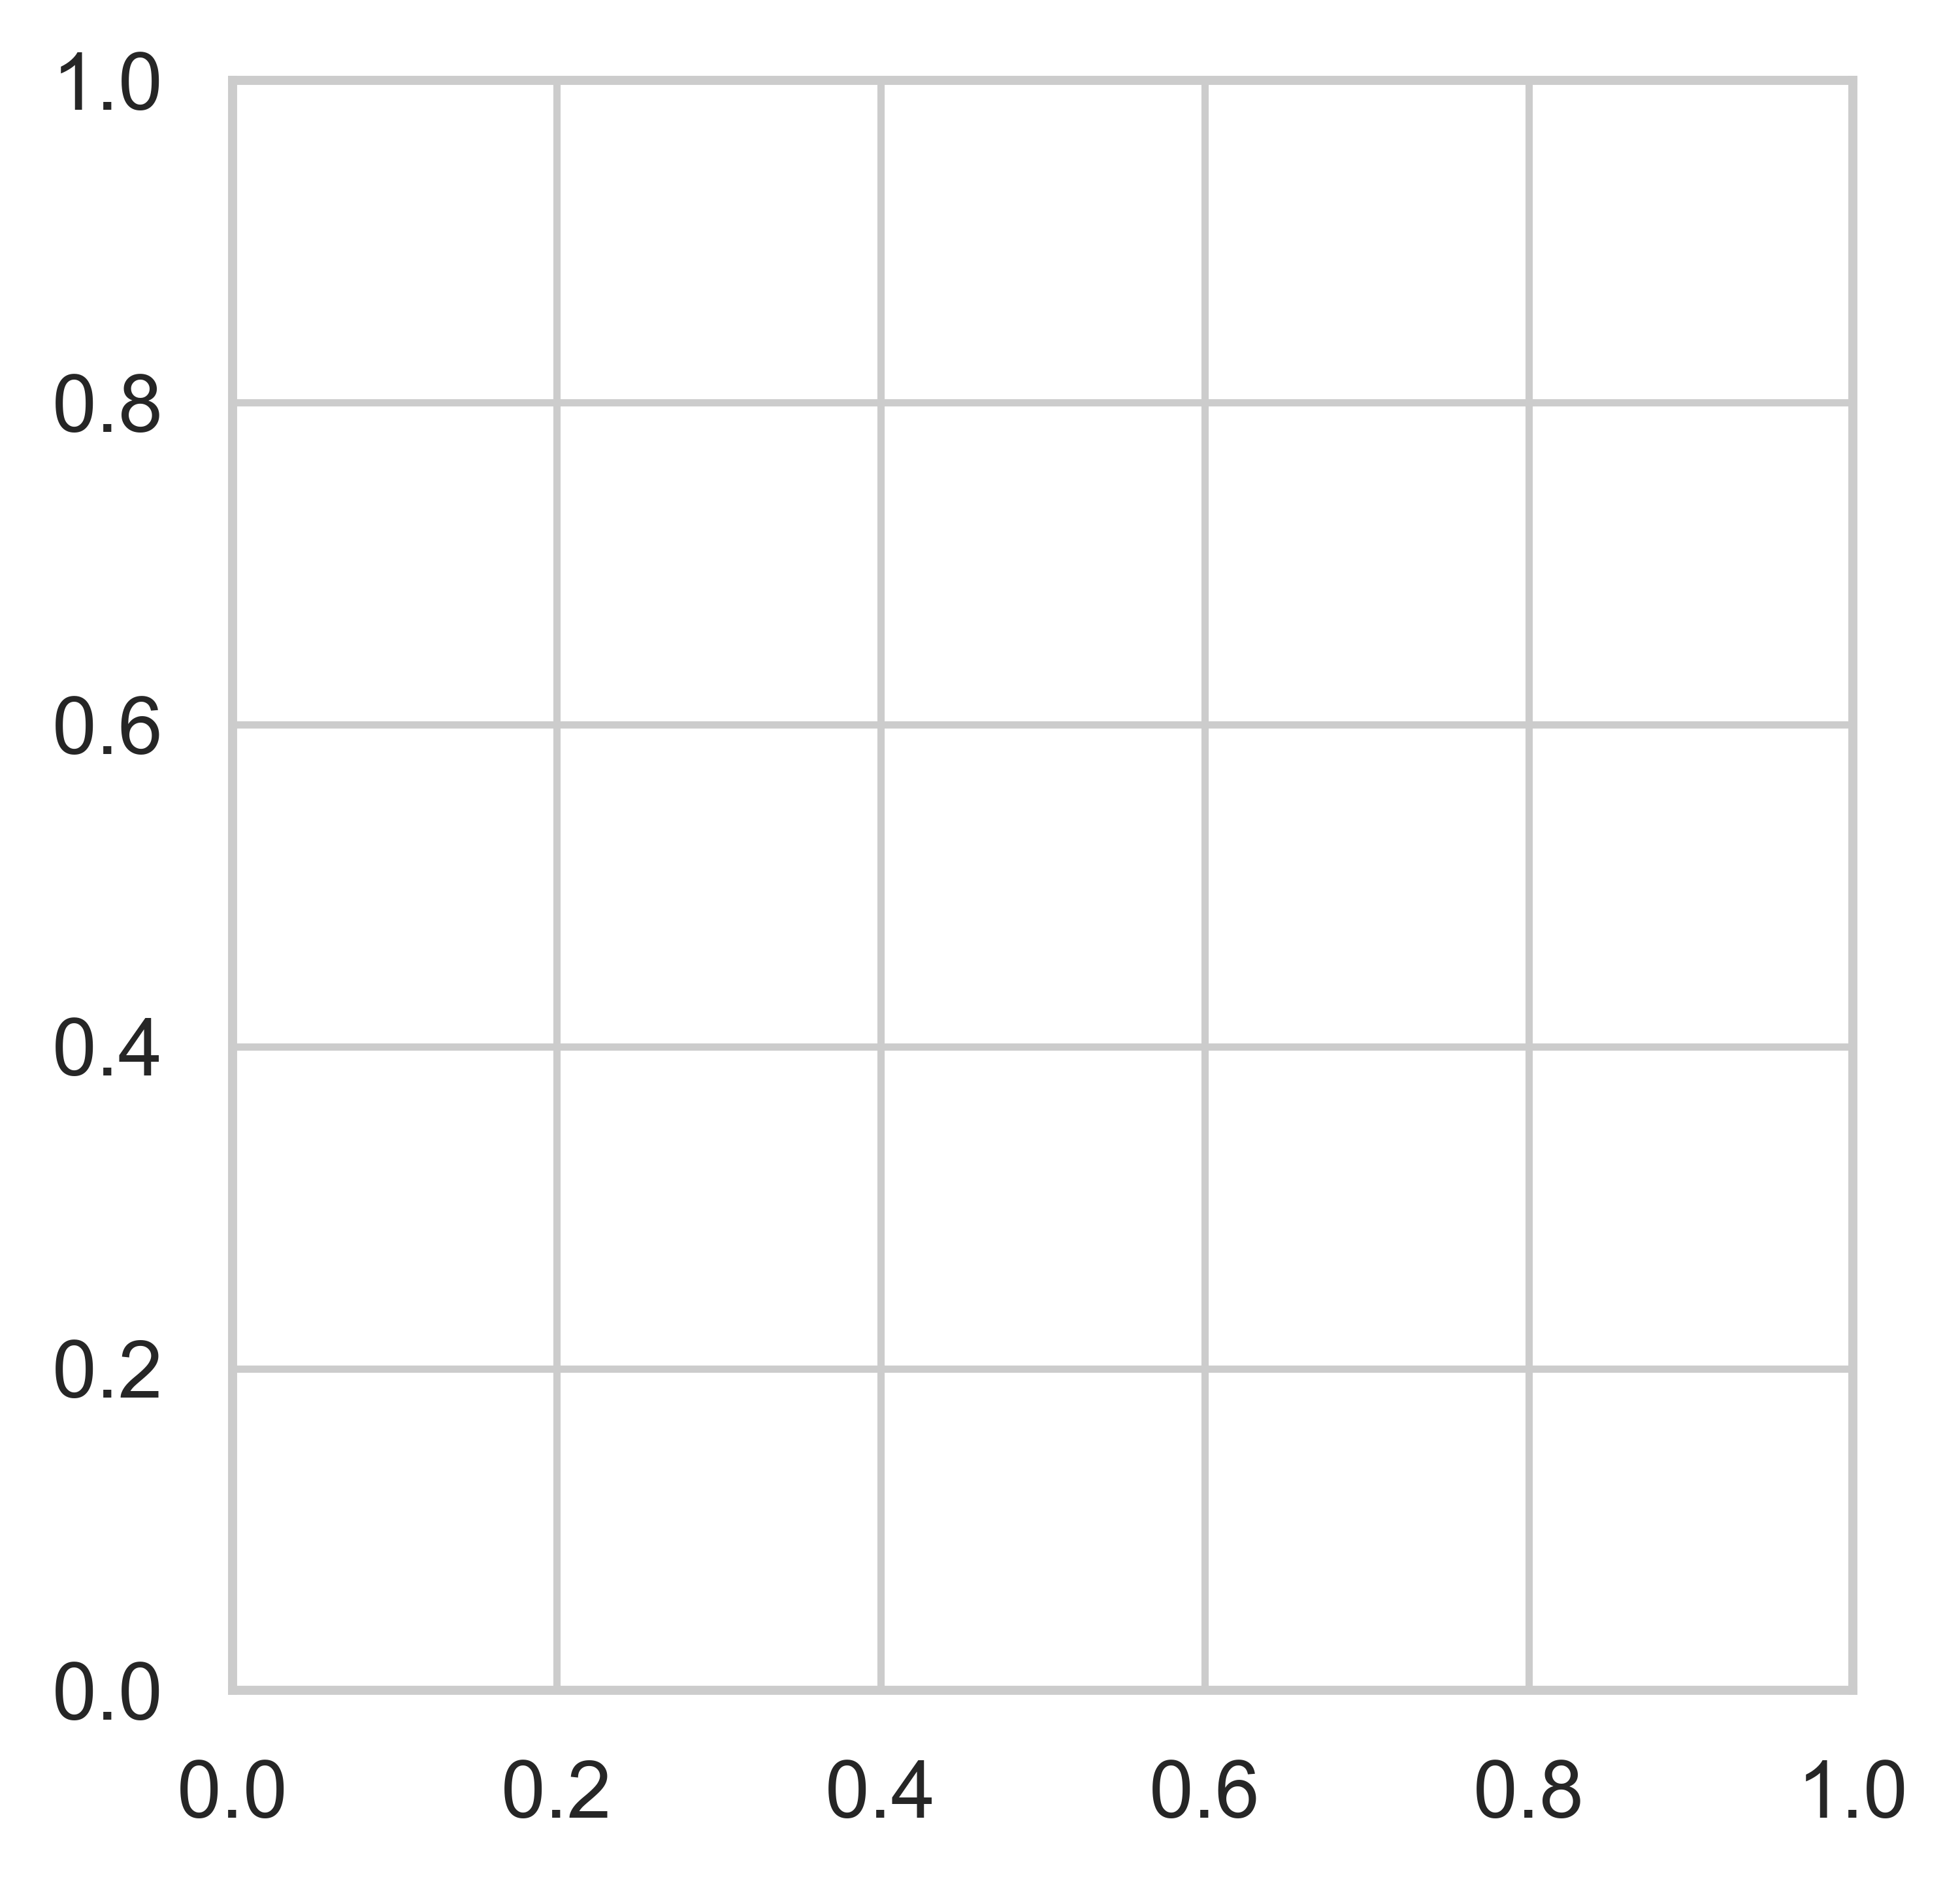

In [26]:
from sklearn import tree
fn=feature_names
cn=df.columns[1]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);



InvalidParameterError: The 'class_names' parameter of plot_tree must be an instance of 'list' or None. Got 'Solar Generation(MU) after 365 days' instead.

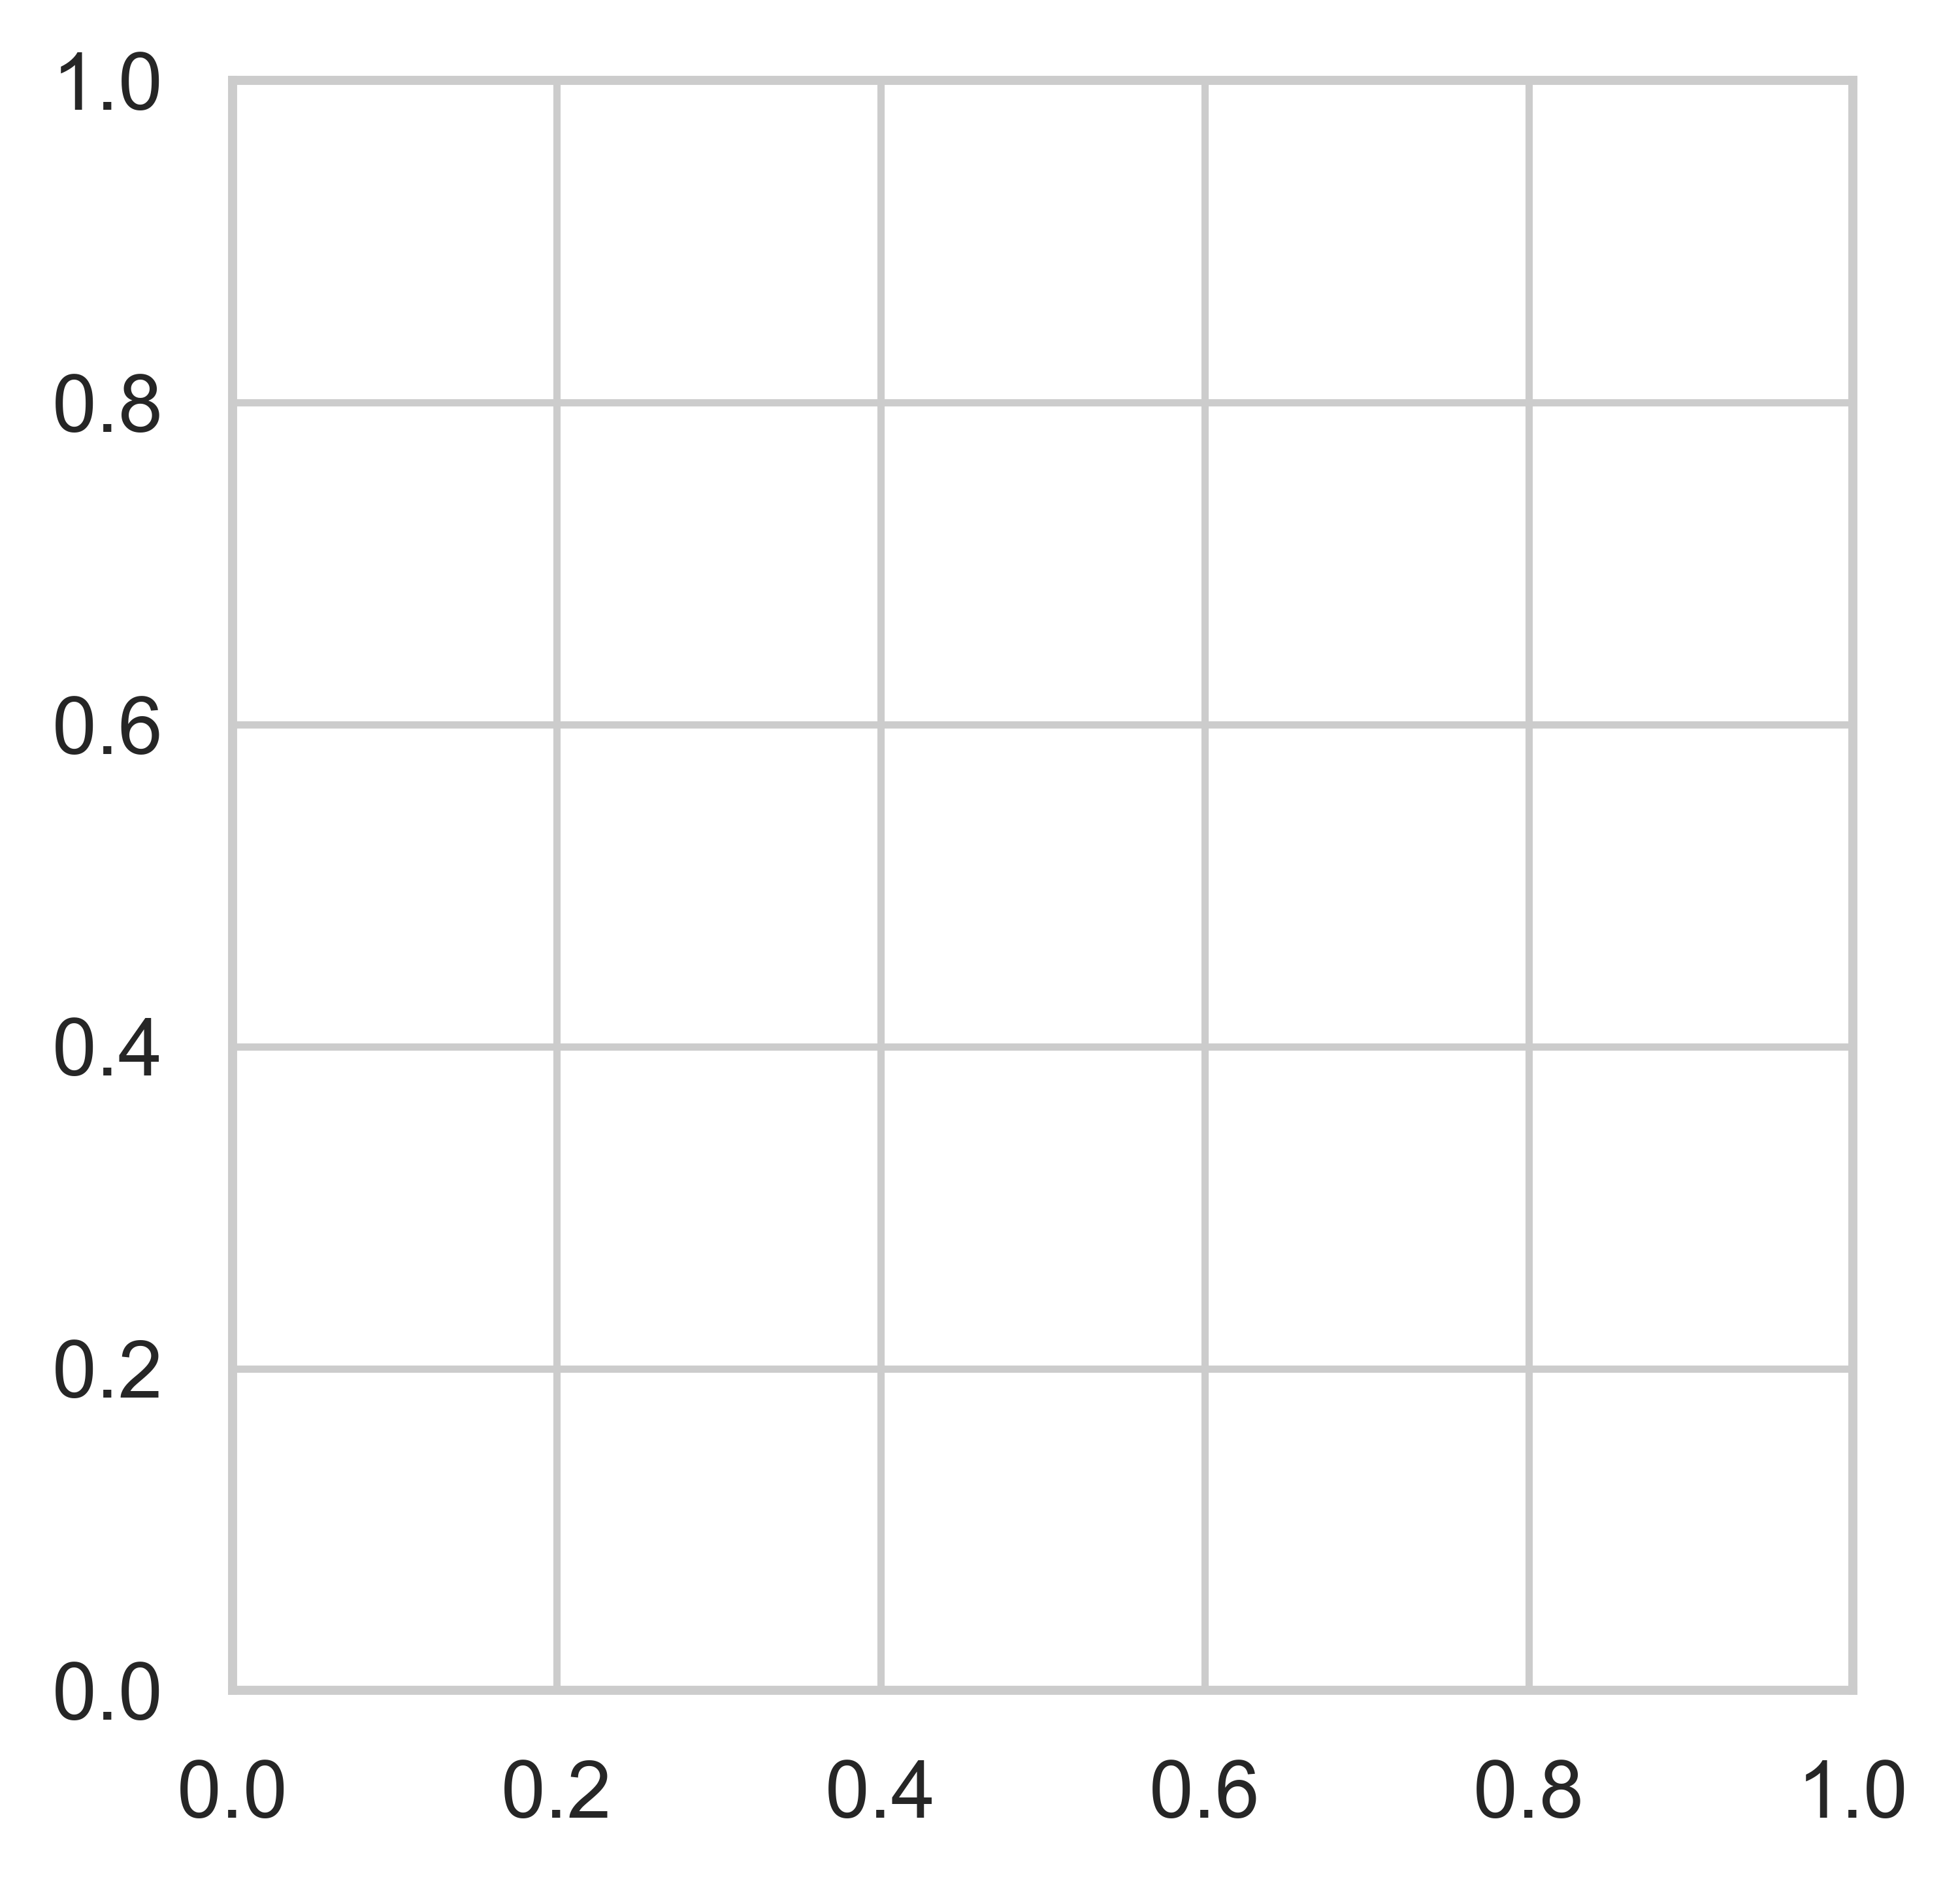

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

# Assuming 'fn' is an array, convert it to a list
fn = fn.tolist()  

# Set the 'cn' variable to the column name from the DataFrame 'df'
cn = df.columns[1]

# Assuming 'rf' is your Random Forest model
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4, 4), dpi=800)
tree.plot_tree(rf.estimators_[0], 
               feature_names=fn, 
               class_names=cn, 
               filled=True)

plt.show()


In [28]:
feature_names = np.array([df.columns[0],df.columns[1]])

In [29]:
from sklearn.tree import export_graphviz


In [30]:
df1

,Forecast
2022-03-28,243.701200
2022-03-29,244.636000
2022-03-30,236.215762
2022-03-31,242.841333
2022-04-01,258.965883
...,...
2023-03-23,261.983383
2023-03-24,261.983383
2023-03-25,261.983383
2023-03-26,261.983383


In [31]:
df1.describe()

,Forecast
count,365.000000
mean,225.591141
std,33.264748
min,117.946000
25%,194.956106
50%,236.215762
75%,257.147850
max,261.983383
